In [1]:
import PIL
from PIL import Image
import os
import numpy as np
import random
import matplotlib.pyplot as plt 

In [4]:
#image = Image.open("/home/tanya/Documents/Dip/Programs/Histogram_Matching/gray.jpeg")
image = Image.open("gray.jpeg")

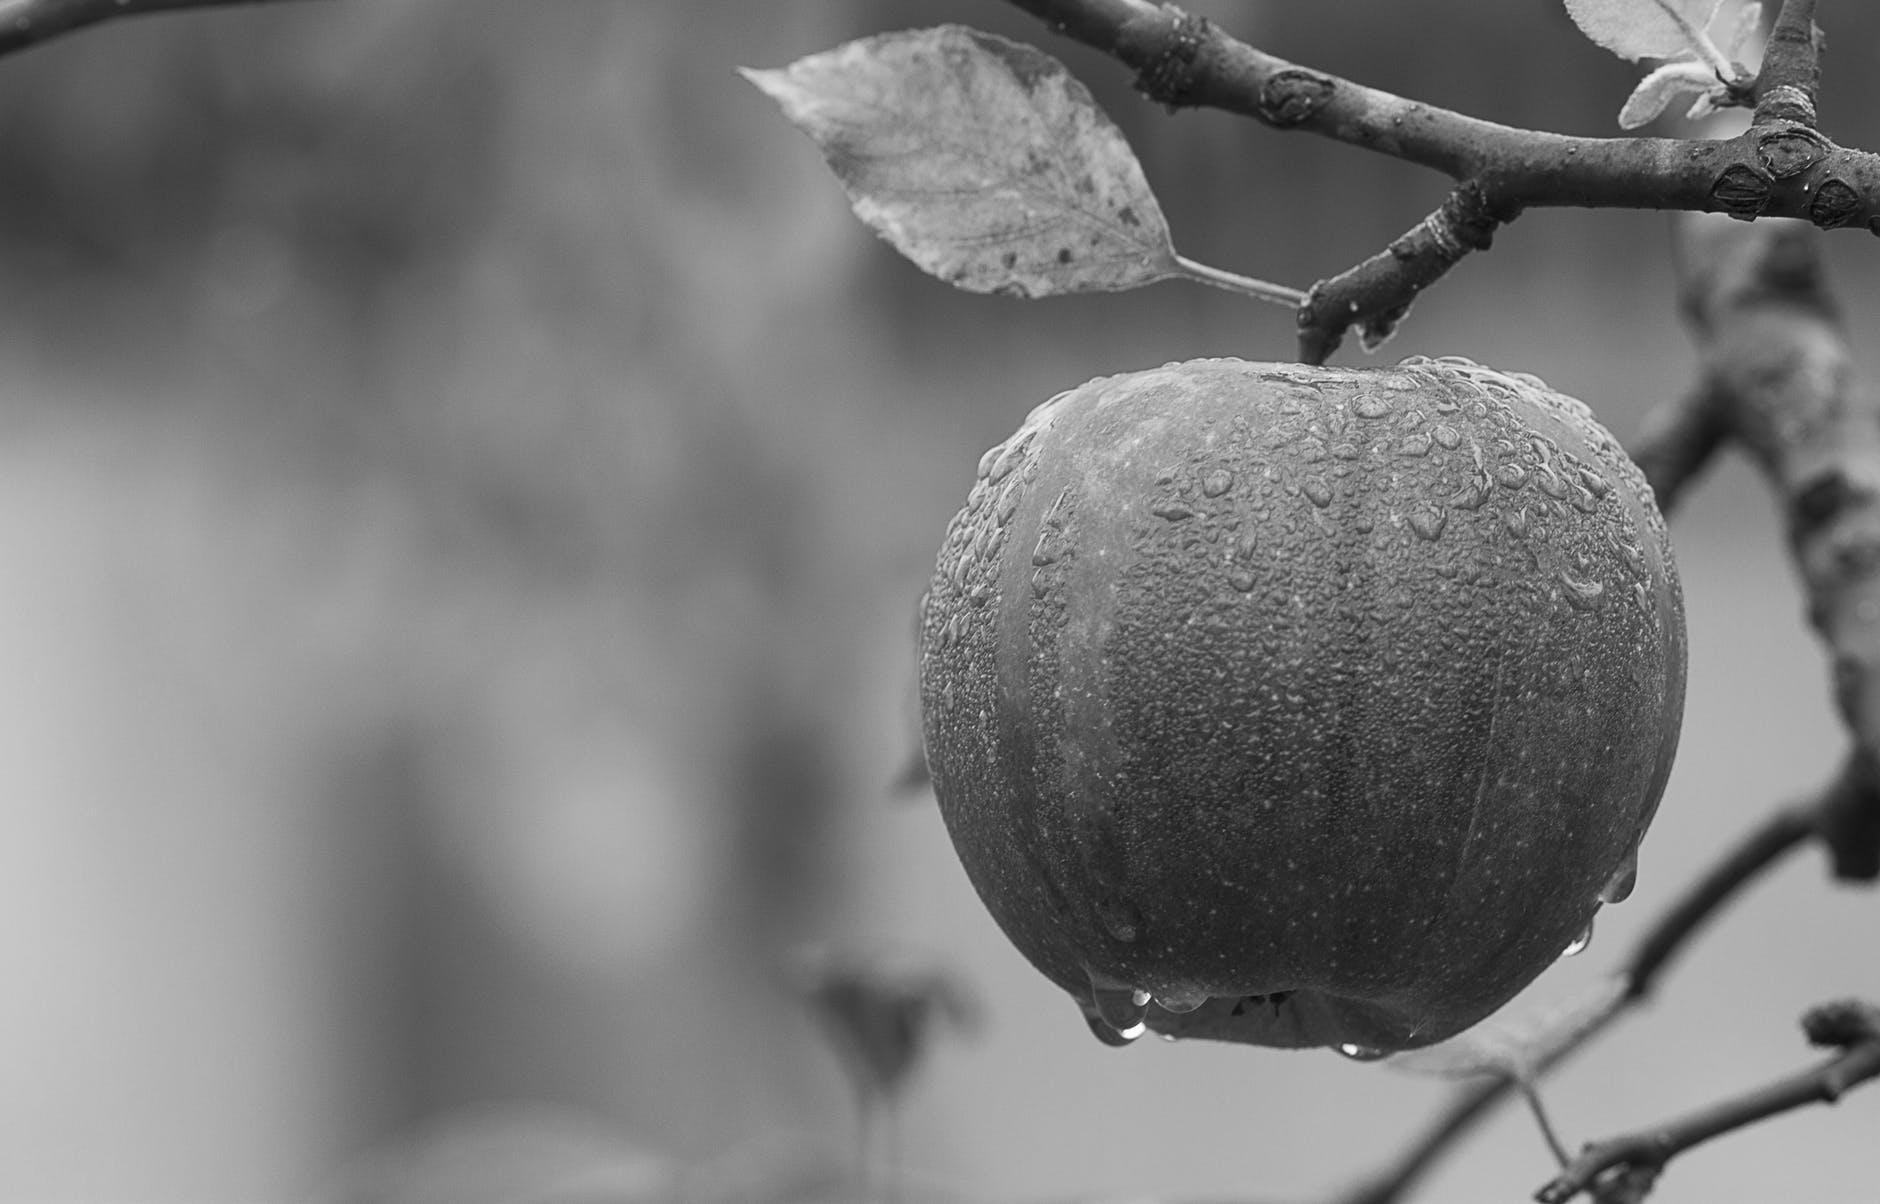

In [5]:
image

In [6]:
rows, cols = image.size
pixel = image.load()
print(pixel)
inten_freq = {}
for i in range(256):
    inten_freq[i] = 0

In [7]:
#inten_freq

In [8]:
for i in range(rows):
    for j in range(cols):
        inten_freq[pixel[i,j]]+=1
        #inten_freq[pixel[i,j]]+= 1
        #print("hello")

<BarContainer object of 256 artists>

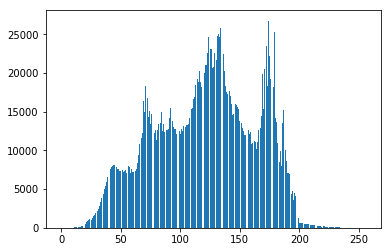

In [9]:
plt.bar(inten_freq.keys(), inten_freq.values())

In [10]:
total_size = rows*cols
prob_inten = {}
for i in range(256):
    prob_inten[i] = inten_freq[i]/total_size  #CHANGED

In [11]:
#prob_inten         # we dont plot PDF but intensity

In [12]:
cumu_freq = {}
prob = 0;
for i in range(256):
    prob += prob_inten[i]
    cumu_freq[i] = prob

In [13]:
#cumu_freq

In [14]:
output_signal = {}
L = 256
for i in range(256):
    output_signal[i] = round((L-1)*cumu_freq[i])

In [15]:
#output_signal

In [16]:
for i in range(rows):
    for j in range(cols):
        pixel[i,j] = output_signal[pixel[i,j]]

In [17]:
freq_output = {}
for i in range(256):
    freq_output[i] = 0
for i in range(rows):
    for j in range(cols):
        freq_output[pixel[i,j]] += 1

In [18]:
#freq_output

<BarContainer object of 256 artists>

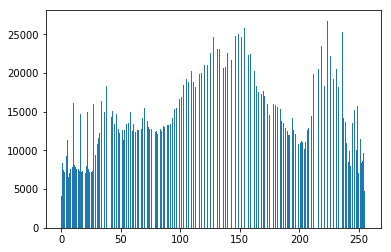

In [19]:
plt.bar(freq_output.keys(), freq_output.values())

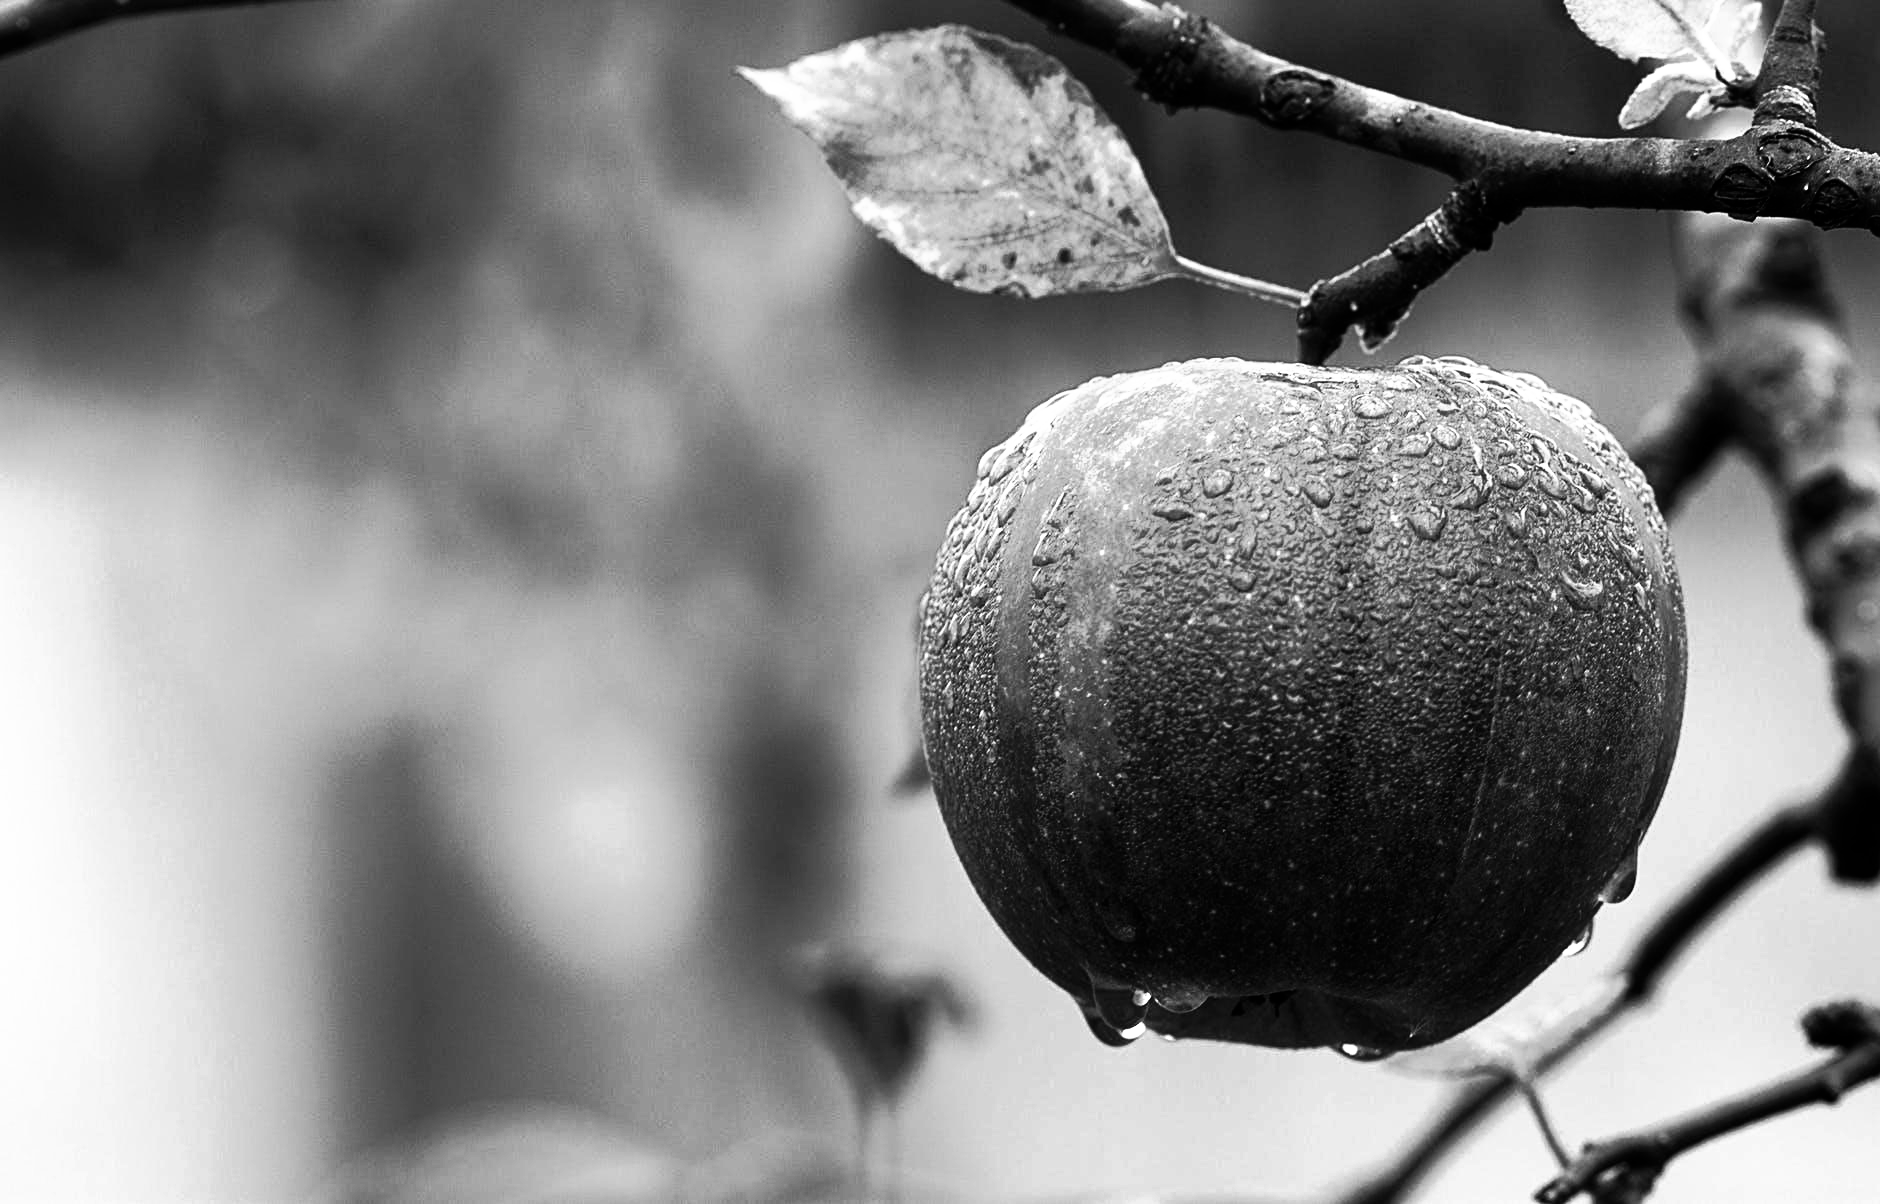

In [18]:
image

In [19]:
#image = Image.open("/home/tanya/Documents/Dip/Programs/Histogram_Matching/gray.jpeg")
image = Image.open("gray.jpeg")

In [20]:
specified_histo = image.load()
for i in range(rows):
    for j in range(cols):
        specified_histo[i,j] = 255-specified_histo[i,j]

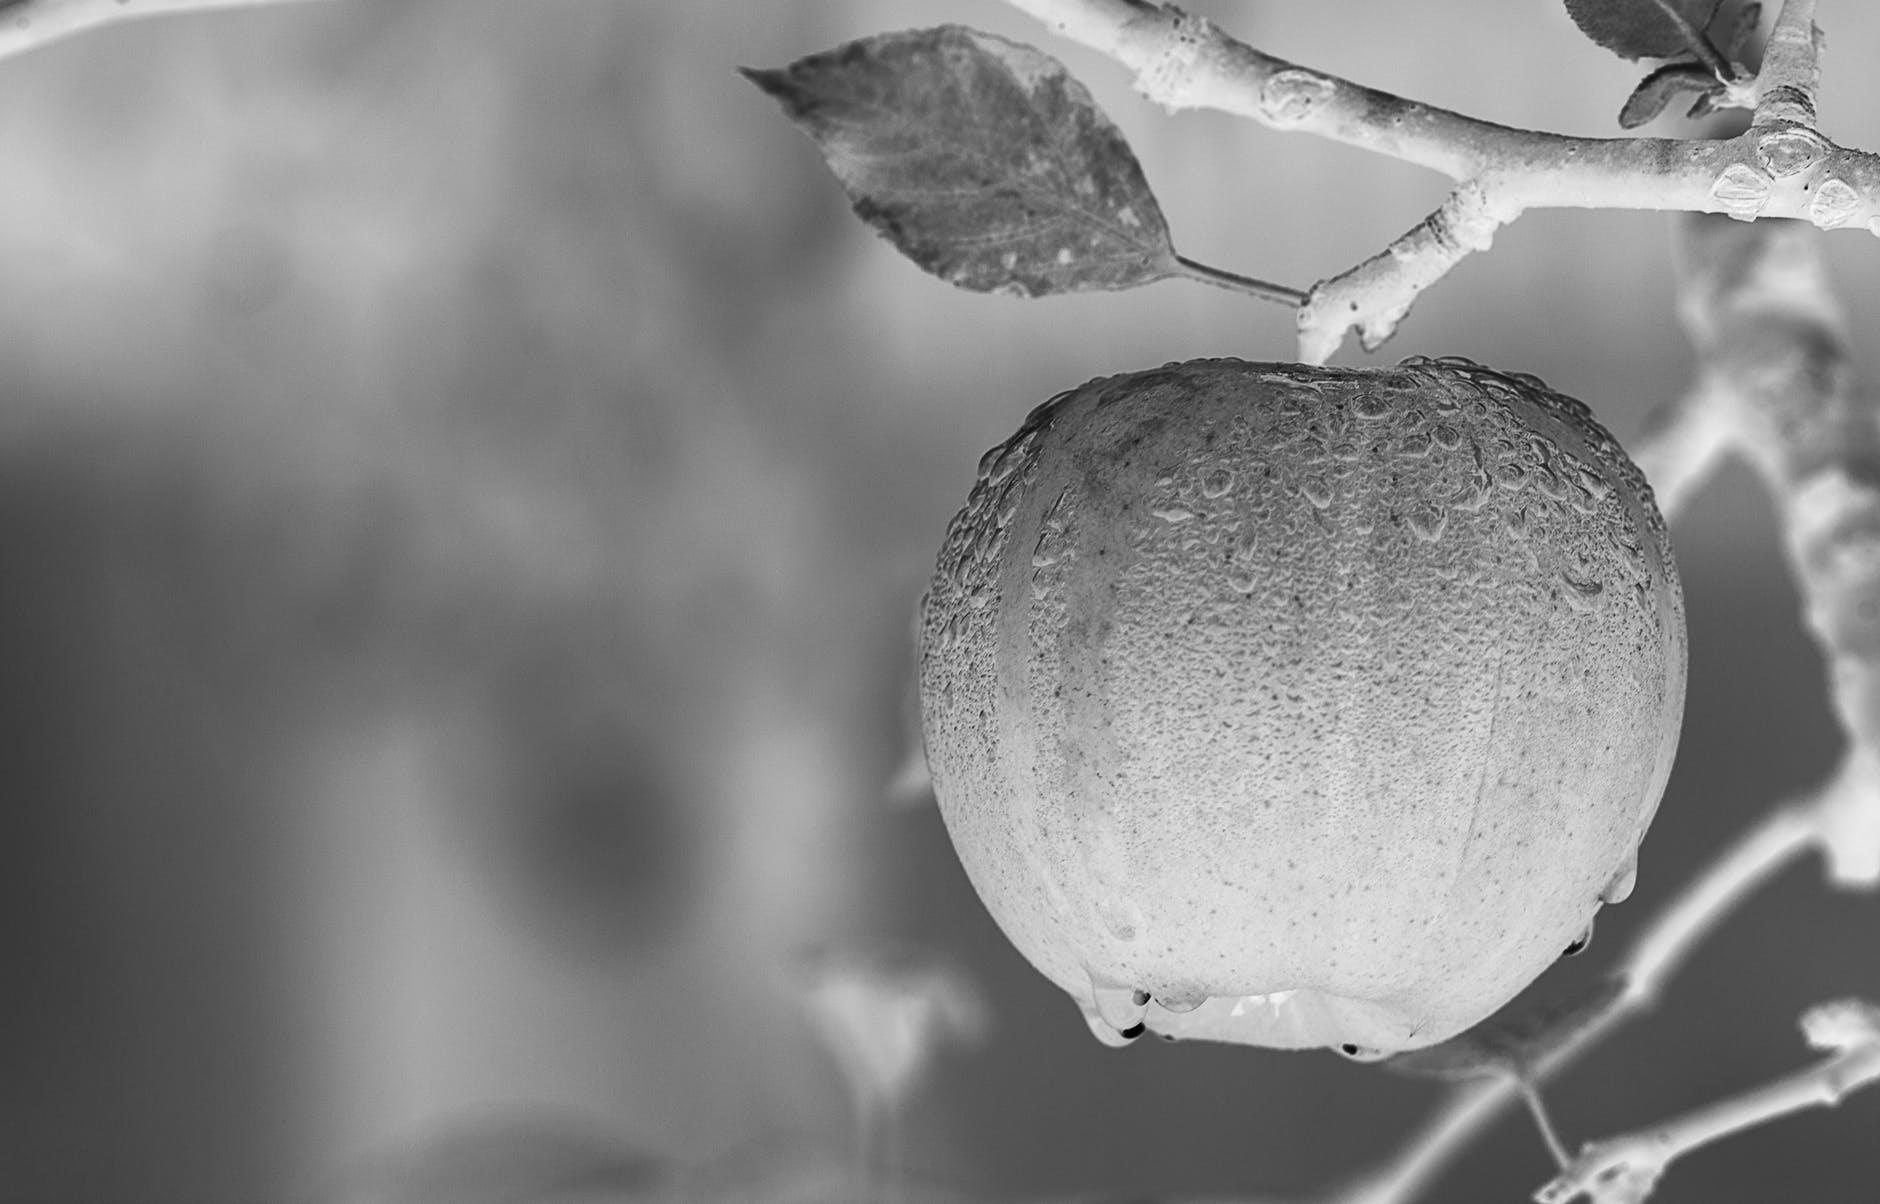

In [20]:
image

In [25]:
freq_specified_histo = {}
for i in range(256):
    freq_specified_histo[i] = 0
for i in range(rows):
    for j in range(cols):
        freq_specified_histo[specified_histo[i,j]] = freq_specified_histo[specified_histo[i,j]] + 1

<BarContainer object of 256 artists>

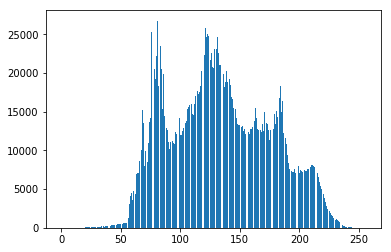

In [26]:
plt.bar(freq_specified_histo.keys(), freq_specified_histo.values())

In [27]:
prob_speci = {}
for i in range(256):
    prob_speci[i] = 0
for i in range(256):
    prob_speci[i] = freq_specified_histo[i]/total_size

In [28]:
cumu_speci = {}
prob = 0
for i in range(256):
    prob += prob_speci[i]
    cumu_speci[i] = prob

In [29]:
cumu_speci

{0: 1.1928324026295328e-05,
 1: 1.45790626988054e-05,
 2: 2.253127871633562e-05,
 3: 2.7832756061355765e-05,
 4: 3.666855163638934e-05,
 5: 4.285360853891284e-05,
 6: 4.903866544143634e-05,
 7: 5.213119389269809e-05,
 8: 5.7874461016469915e-05,
 9: 6.0525199688979986e-05,
 10: 6.317593836149006e-05,
 11: 6.715204637025517e-05,
 12: 7.06863646002686e-05,
 13: 7.819679083904714e-05,
 14: 8.12893192903089e-05,
 15: 8.659079663532904e-05,
 16: 9.36594330953559e-05,
 17: 0.00010249522867038948,
 18: 0.00011353997313918145,
 19: 0.00012193397893546334,
 20: 0.0001391637803067788,
 21: 0.00015860253057185269,
 22: 0.00018864423552696684,
 23: 0.00022575457694210785,
 24: 0.0002672828161447657,
 25: 0.00030174241888739664,
 26: 0.0003454796069838128,
 27: 0.0003958436417615042,
 28: 0.0004351629320704036,
 29: 0.0004890612850781084,
 30: 0.0005500282745458401,
 31: 0.0006220400084823637,
 32: 0.0006909592139676256,
 33: 0.0007585530501166324,
 34: 0.0008354244716194246,
 35: 0.0009211316886972

In [30]:
g_output = {}
L = 256
for i in range(256):
    g_output[i] = round((L-1)*cumu_speci[i])

In [31]:
#g_output

In [32]:
alter_dict = {}
for i in g_output:
    alter_dict[g_output[i]] = i

In [33]:
mapping_dict = {}
for i in range(256):
    mapping_dict[i] = 0
for i in output_signal:
    if(alter_dict.get(output_signal[i])!= None):
        mapping_dict[i] = alter_dict[output_signal[i]] 
    else:
        num = output_signal[i]-1
        while(num>=0):
            if(alter_dict.get(num)!= None):
                mapping_dict[i] = alter_dict[num]
                break
            else:
                num = num-1
        if(num<0):
            mapping_dict[i] = 0
            

In [34]:
#mapping_dict

In [35]:
#image = Image.open("/home/tanya/Documents/Dip/Programs/Histogram_Matching/gray.jpeg")
image = Image.open("gray.jpeg")
pixel = image.load()

In [36]:
for i in range(rows):
    for j in range(cols):
        pixel[i,j]= mapping_dict[pixel[i,j]]

In [37]:
final_hist = {}
for i in range(256):
    final_hist[i] = 0
for i in range(rows):
    for j in range(cols):
        final_hist[pixel[i,j]] += 1

In [84]:
#final_hist

<BarContainer object of 256 artists>

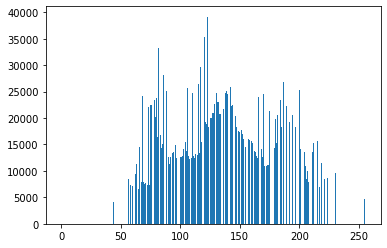

In [33]:
plt.bar(final_hist.keys(), final_hist.values())

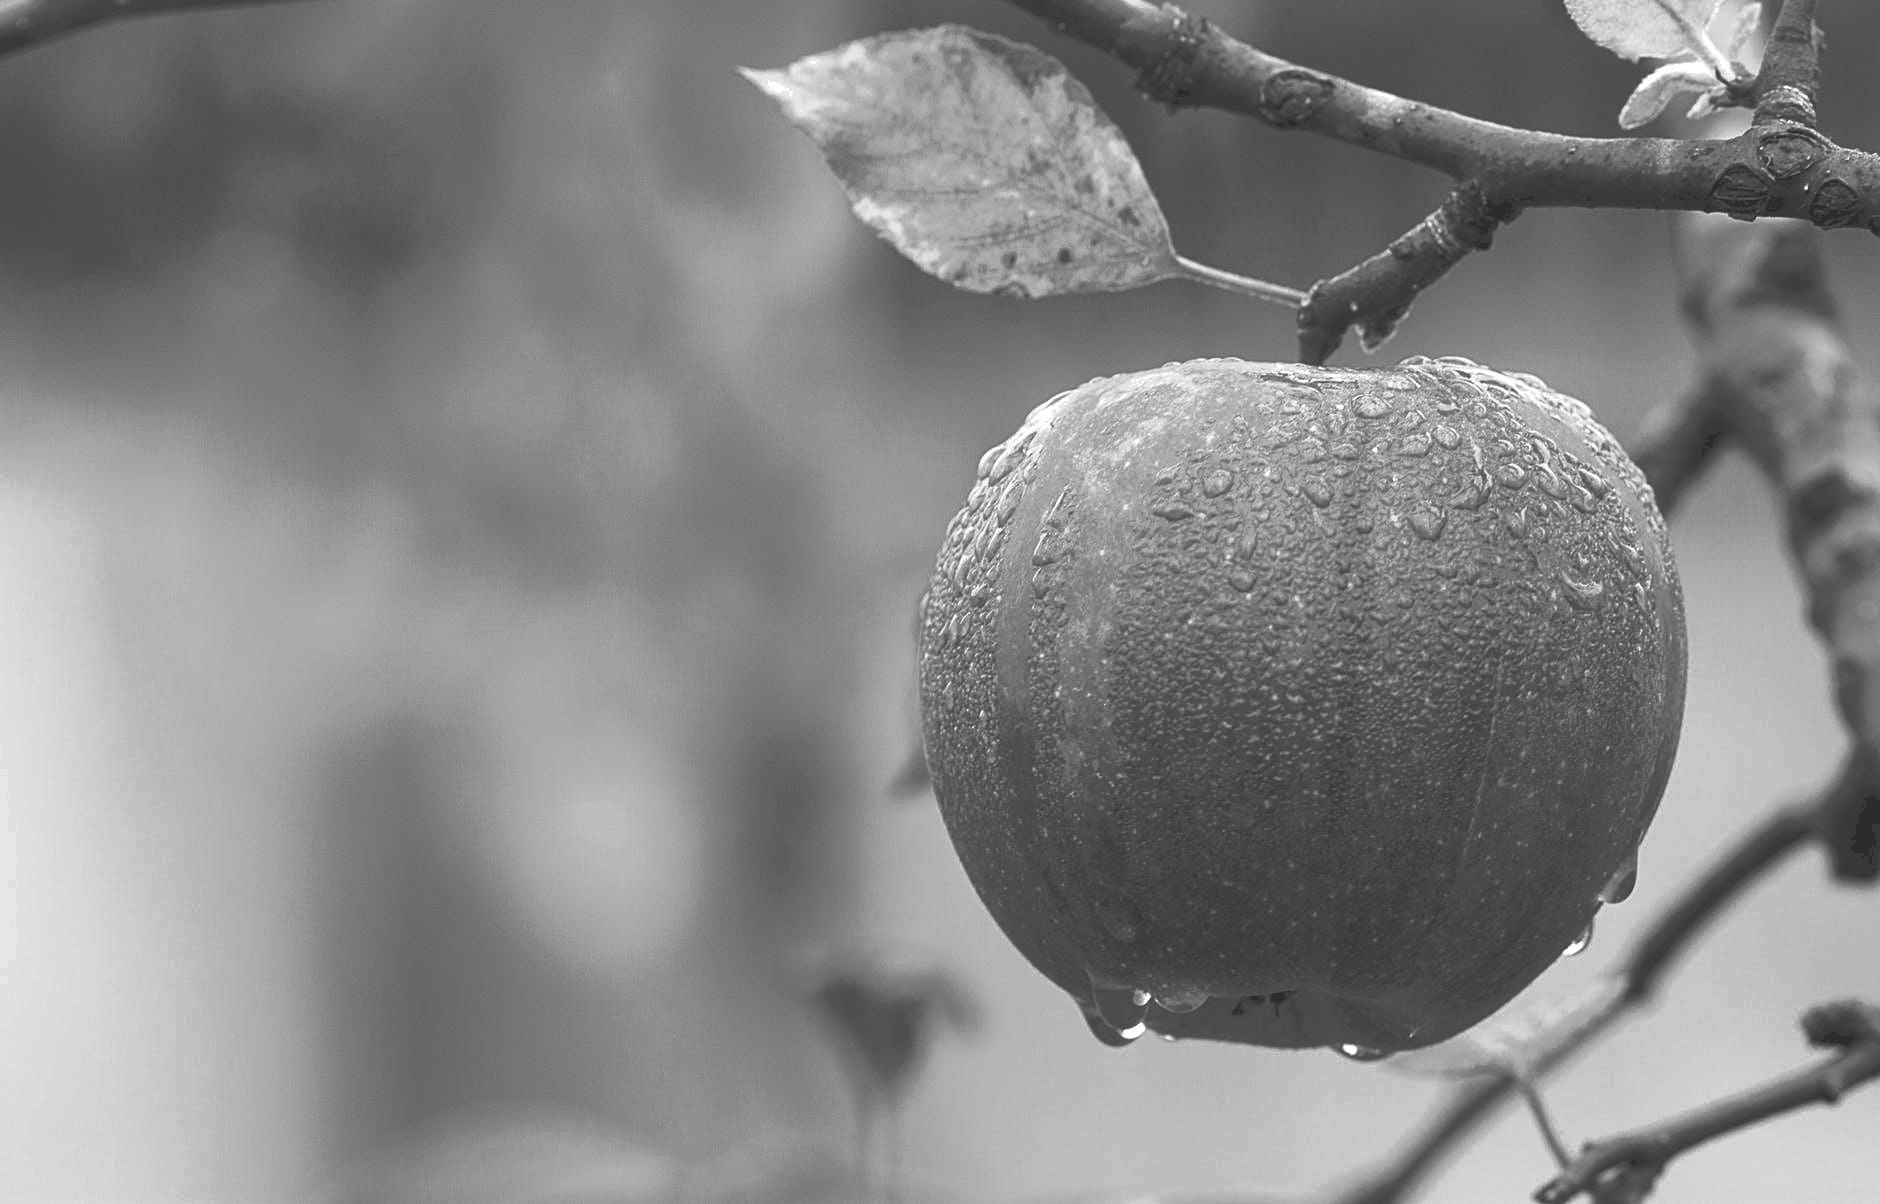

In [34]:
image